In [1]:
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
import numpy as np
from itertools import product

In [22]:
data = [[0, 0], [1, 0], [0, 1], [1, 1]]
labelsAND = [0, 0, 0, 1] # AND
labelsXOR = [0, 1, 1, 0] # XOR
labelsOR = [1, 0, 0, 0] # OR

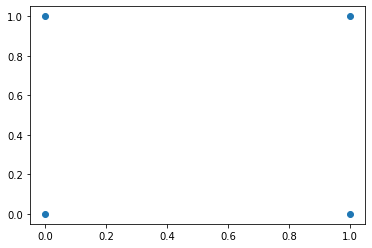

In [23]:
plt.scatter([point[0] for point in data], [point[1] for point in data])
plt.show()

In [25]:
classifierAND = Perceptron(max_iter = 40)
classifierXOR = Perceptron(max_iter = 40)
classifierOR = Perceptron(max_iter = 40)

classifierAND.fit(data, labelsAND)
classifierXOR.fit(data, labelsXOR)
classifierOR.fit(data, labelsOR)

print(classifierAND.score(data, labelsAND))
print(classifierXOR.score(data, labelsXOR))
print(classifierOR.score(data, labelsOR))

1.0
0.5
1.0


#### This method returns the distance those points are from the decision boundary. 
#### The closer the number is to 0, the closer that point is to the decision boundary.

In [27]:
print(classifierAND.decision_function([[0, 0], [1, 1], [0.5, 0.5]]))
print(classifierOR.decision_function([[0, 0], [1, 1], [0.5, 0.5]]))

[-2.  2.  0.]
[ 1. -3. -1.]


#### Let's create a grid of points to make a heat map that reveals the decision boundary.

In [29]:
x_values = np.linspace(0, 1, 100)
y_values = np.linspace(0, 1, 100)

# product() will make all the possible combinations of X and y values
point_grid = list(product(x_values, y_values))

distancesAND = classifierAND.decision_function(point_grid)
distancesXOR = classifierXOR.decision_function(point_grid)
distancesOR = classifierOR.decision_function(point_grid)
print(distancesAND)

[-2.         -1.97979798 -1.95959596 ...  1.95959596  1.97979798
  2.        ]


In [30]:
abs_distancesAND = abs(distancesAND)
abs_distancesXOR = abs(distancesXOR)
abs_distancesOR = abs(distancesOR)
print(abs_distancesAND)

[2.         1.97979798 1.95959596 ... 1.95959596 1.97979798 2.        ]


#### Check how the decission boundary changes

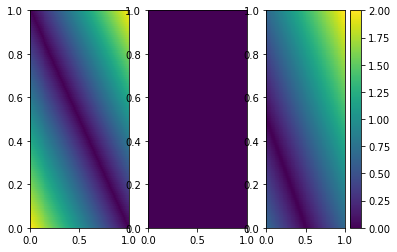

In [46]:
distances_matrixAND = np.reshape(abs_distancesAND, (100,100))
distances_matrixXOR = np.reshape(abs_distancesXOR, (100,100))
distances_matrixOR = np.reshape(abs_distancesOR, (100,100))

plt.subplot(1, 3, 1)
plt.pcolormesh(x_values, y_values, distances_matrixAND)

plt.subplot(1, 3, 2)
plt.pcolormesh(x_values, y_values, distances_matrixXOR)

plt.subplot(1, 3, 3)
plt.pcolormesh(x_values, y_values, distances_matrixOR)

plt.colorbar(heatmap)
plt.show()

#### Perceptrons can’t solve problems that aren’t linearly separable. However, you can combine multiple perceptrons (neural nets) to get a solution for this.